# Práctica 6. Indexación y selección de datos

In [1]:
import pandas as pd

In [2]:
ventas = pd.read_csv('Data/ventas.csv', encoding='latin-1')

# 1. Acceso a columnas y estadísticas básicas:

1. Imprime las primeras 5 filas del DataFrame.
2. Calcula la media y la desviación estándar de la columna num_passengers. (Aplicar método mean() y std())
3. ¿Cuál es el número máximo de pasajeros registrados? (Aplicar método max()).

In [3]:
ventas.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [13]:
ventas_desviacion = ventas['num_passengers'].std()
print(f"Desviacion de vuelos:{ventas_desviacion}")

Desviacion de vuelos:1.020164730385021


In [15]:
max_vuelos=ventas['num_passengers'].max()
print(f'Maximo de vuelos:{ventas}')

Maximo de vuelos:       num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0                   2      Internet  RoundTrip            262              19   
1                   1      Internet  RoundTrip            112              20   
2                   2      Internet  RoundTrip            243              22   
3                   1      Internet  RoundTrip             96              31   
4                   2      Internet  RoundTrip             68              22   
...               ...           ...        ...            ...             ...   
49995               2      Internet  RoundTrip             27               6   
49996               1      Internet  RoundTrip            111               6   
49997               1      Internet  RoundTrip             24               6   
49998               1      Internet  RoundTrip             15               6   
49999               1      Internet  RoundTrip             19               6   

       fli

# 2. Filtrado de datos:

1.Filtra las filas donde el trip_type es "ida y vuelta".

2.Encuentra las reservas realizadas desde el país "España"

In [7]:
ventas['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [8]:
ventas[ventas['trip_type']=='RoundTrip']

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


# 3. Selección de filas y columnas:

1.Selecciona las columnas flight_day, flight_hour y length_of_stay.

2.Muestra los datos de la fila correspondiente al vuelo con la duración más larga.

In [10]:
ventas[['flight_day','flight_hour','length_of_stay']]

,flight_day,flight_hour,length_of_stay
0,Sat,7,19
1,Sat,3,20
2,Wed,17,22
3,Sat,4,31
4,Wed,15,22
...,...,...,...
49995,Sat,9,6
49996,Sun,4,6
49997,Sat,22,6
49998,Mon,11,6


# 4. Agregación y agrupación:

1. Agrupa los datos por ruta y calcula la suma total de pasajeros para cada ruta. (aplicar groupby(), sum()).

2. ¿Cuál es la ruta más popular en términos de pasajeros?

In [6]:
Ruta=ventas.groupby('route')['num_passengers'].sum().sort_values(ascending=True)

In [7]:
Ruta.tail(1)

route
AKLKUL    4450
Name: num_passengers, dtype: int64

# 5.Creación de nuevas columnas:

1. Crea una nueva columna llamada booking_lead_days que represente la diferencia entre purchase_lead y length_of_stay.

2. ¿Cuál es el valor medio de booking_lead_days?

In [8]:
ventas['booking_lead_days']=ventas['purchase_lead']-ventas['length_of_stay']

In [6]:
ventas

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


# 6. Visualización de datos:

Crea un gráfico de barras que muestre la cantidad de pasajeros por día de la semana (flight_day).

In [10]:
ventas['booking_lead_days'].mean()

61.89592

In [11]:
Demanda_semanal=ventas.groupby('flight_day')['num_passengers'].mean()

In [13]:
import matplotlib.pyplot as plt

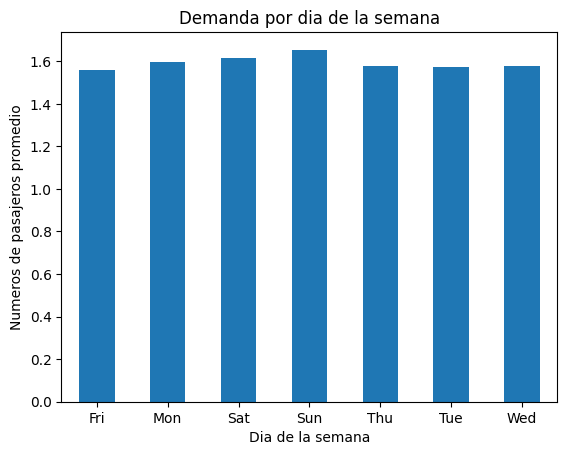

In [14]:
Demanda_semanal.plot.bar(x=Demanda_semanal.index,y=Demanda_semanal,rot=0)
plt.title('Demanda por dia de la semana')
plt.xlabel('Dia de la semana')
plt.ylabel('Numeros de pasajeros promedio')
plt.show()

# 7. Análisis de completitud de reservas:


Calcula la proporción de reservas completadas (donde booking_complete es verdadero) en comparación con todas las reservas.

In [19]:
ventas['booking_complete'].unique()

array([0, 1], dtype=int64)

In [21]:
completo=ventas[ventas['booking_complete']==1].count()

In [23]:
Total=ventas['booking_complete'].count()

In [25]:
print(f"La proporcion de reservas completas es {(completo/Total)*100}%")

La proporcion de reservas completas es num_passengers           14.956
sales_channel            14.956
trip_type                14.956
purchase_lead            14.956
length_of_stay           14.956
flight_hour              14.956
flight_day               14.956
route                    14.956
booking_origin           14.956
wants_extra_baggage      14.956
wants_preferred_seat     14.956
wants_in_flight_meals    14.956
flight_duration          14.956
booking_complete         14.956
dtype: float64%
